<center>
<image>
<section data-background="img/cover.jpg" data-state="img-transparent no-title-footer">
<div class="intro-body">
<div class="intro_h1"><h1>Team $T^3$ present...</h1></div>
<h3>NAFF: a Naive Assessment of Forecast Fluctuations</h3>
<center>

<p>&nbsp;</p>
<p>&nbsp;</p>
    </center>
</div>
</section>
</image>
    </center>

In this short project we aimed to assess how much MOGREPS-UK forecasts "jump around", with particular interest in any seasonal component -- that is, are forecasts more constant in summer than in winter? Are there particular weather events which are hard to pin down beyond a short time horizon?


<center>
    <h1> Storm Desmond</h1>
    
<img src="desmond.gif">
</center>

In [14]:
import numpy, scipy, cartopy, netCDF4, seaborn, mogreps, tplot
import matplotlib

In [15]:
from pathlib import Path

In [16]:
forecast_3 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 15, 0 , 3),data_folder = Path('.'))
forecast_9 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 9, 0 , 9),data_folder = Path('.'))
forecast_15 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 0 , 15),data_folder = Path('.'))
forecast_21 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 4, 21, 0 , 21),data_folder = Path('.'))
forecast_27 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 4, 15, 0 , 27),data_folder = Path('.'))
forecast_33 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 4, 9, 0 , 33),data_folder = Path('.'))

File prods_op_mogreps-uk_20151205_15_00_003.nc already exists.
File prods_op_mogreps-uk_20151205_09_00_009.nc already exists.
File prods_op_mogreps-uk_20151205_03_00_015.nc already exists.
File prods_op_mogreps-uk_20151204_21_00_021.nc already exists.
File prods_op_mogreps-uk_20151204_15_00_027.nc already exists.
File prods_op_mogreps-uk_20151204_09_00_033.nc already exists.


In [18]:
DS_forecast_3 = netCDF4.Dataset(forecast_3)
DS_forecast_9 = netCDF4.Dataset(forecast_9)
DS_forecast_15 = netCDF4.Dataset(forecast_15)
DS_forecast_21 = netCDF4.Dataset(forecast_21)
DS_forecast_27 = netCDF4.Dataset(forecast_27)
DS_forecast_33 = netCDF4.Dataset(forecast_33)

forecasts = [DS_forecast_3, DS_forecast_9, DS_forecast_15, DS_forecast_21, DS_forecast_27, DS_forecast_33]

In [3]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

Text(0.5,0.98,'Forecasts for sea-level air pressure (Pa) 6pm 5th December 2015 at a variety of lead times')

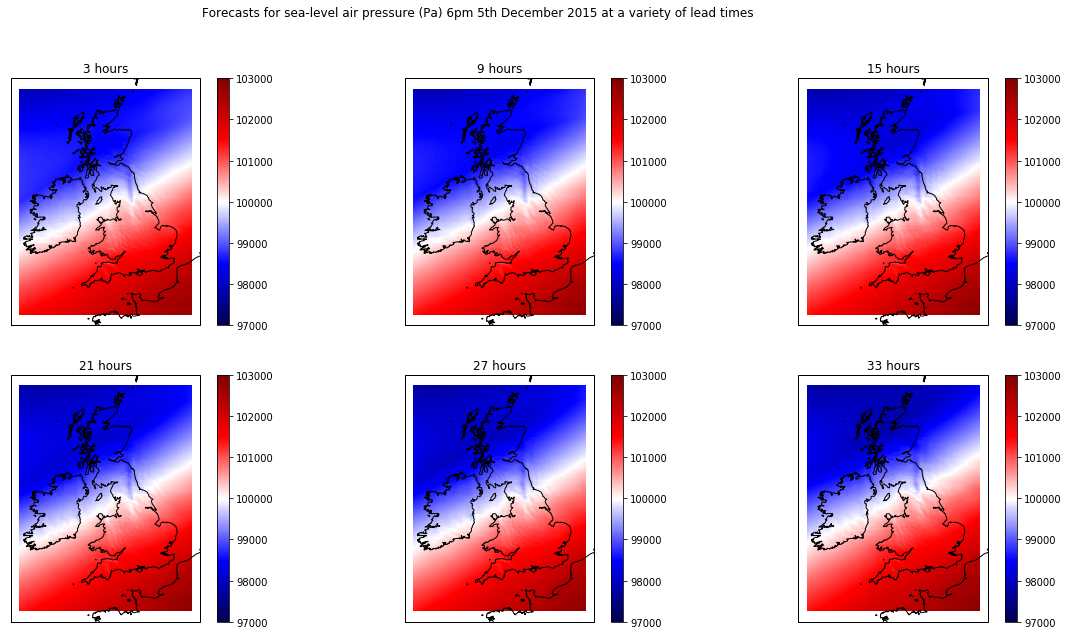

In [113]:
test_variable = "air_pressure_at_sea_level"; v_min = 97000; v_max = 103000
tplot.pressure_plots(forecasts, test_variable, v_min, v_max)
plt.suptitle('Forecasts for sea-level air pressure (Pa) 6pm 5th December 2015 at a variety of lead times')

Seeing the forecasts super-imposed makes it easier to see the forecast evolution as lead-time decreases:

  <IMG SRC="https://i.imgur.com/rOPOLaB.gif">


Text(0.5,0.98,'Difference between x-hour and 3-hour sea-level air pressure (Pa) 6pm 5th December 2015 at a variety of lead times')

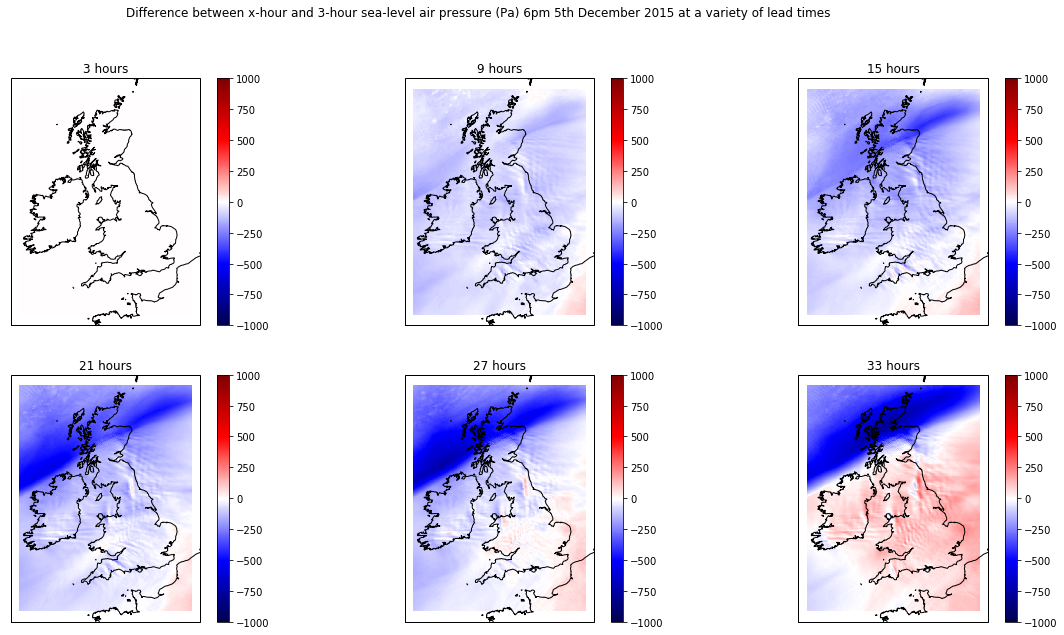

In [92]:
test_variable = "air_pressure_at_sea_level"; v_min = -1000; v_max = 1000
tplot.difference_plots(forecasts, test_variable, v_min, v_max)
plt.suptitle('Difference between x-hour and 3-hour sea-level air pressure (Pa) 6pm 5th December 2015 at a variety of lead times')

Text(0.5,0.98,'Difference between x-hour and 3-hour wind speeds of gust (ms^-1) forecasts for 6pm 15th December 2015')

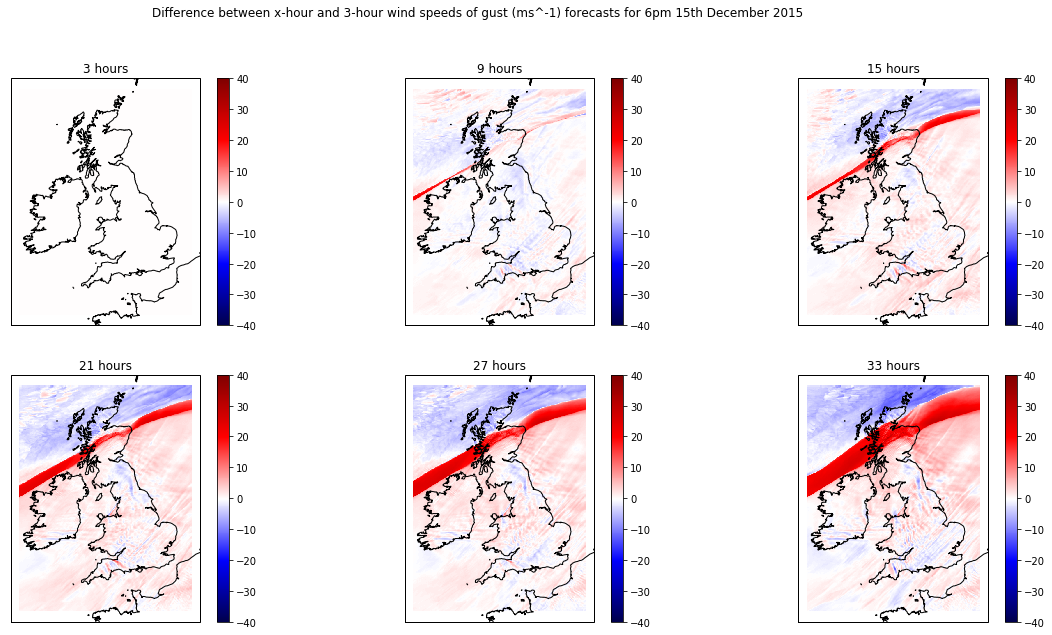

In [93]:
test_variable = "wind_speed_of_gust"; v_min = -40; v_max = 40
tplot.difference_plots(forecasts, test_variable, v_min, v_max)
plt.suptitle("Difference between x-hour and 3-hour wind speeds of gust (ms^-1) forecasts for 6pm 15th December 2015")

We might expect the rainfall rate to be harder to predict, and thus to vary more as new forecasts are produced. 

<center>
<IMG SRC="https://i.imgur.com/LrA82pQ.gif">
</center>

Text(0.5,0.98,'Difference between the x-hour and 3-hour rainfall rate (kg m^-2 s^-1) forecasts for 6pm 15th December 2015')

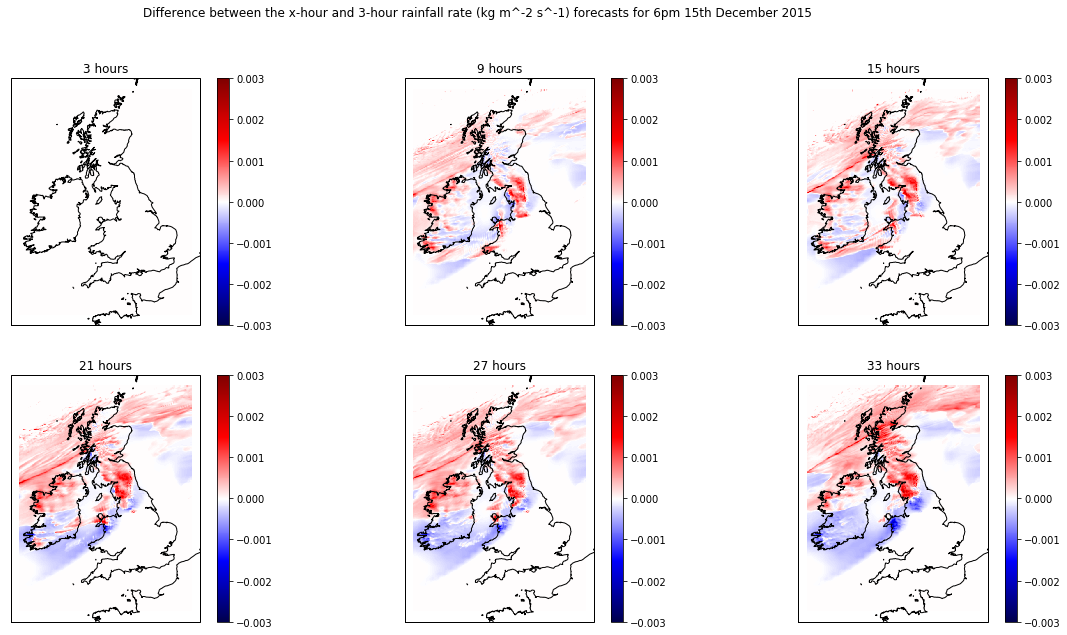

In [94]:
test_variable = "stratiform_rainfall_rate"; v_min = -0.003; v_max = 0.003
tplot.difference_plots(forecasts, test_variable, v_min, v_max)
plt.suptitle("Difference between the x-hour and 3-hour rainfall rate (kg m^-2 s^-1) forecasts for 6pm 15th December 2015")

## Storm Gertrude

A somewhat similar pattern is seen in Storm Gertrude

In [4]:
forecastg_3 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 29, 15, 0 , 3),data_folder = Path('.'))
forecastg_9 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 29, 9, 0 , 9),data_folder = Path('.'))
forecastg_15 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 29, 3, 0 , 15),data_folder = Path('.'))
forecastg_21 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 28, 21, 0 , 21),data_folder = Path('.'))
forecastg_27 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 28, 15, 0 , 27),data_folder = Path('.'))
forecastg_33 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 28, 9, 0 , 33),data_folder = Path('.'))

File prods_op_mogreps-uk_20160129_15_00_003.nc already exists.
File prods_op_mogreps-uk_20160129_09_00_009.nc already exists.
File prods_op_mogreps-uk_20160129_03_00_015.nc already exists.
File prods_op_mogreps-uk_20160128_21_00_021.nc already exists.
File prods_op_mogreps-uk_20160128_15_00_027.nc already exists.
File prods_op_mogreps-uk_20160128_09_00_033.nc already exists.


In [5]:
DS_forecastg_3 = netCDF4.Dataset(forecastg_3)
DS_forecastg_9 = netCDF4.Dataset(forecastg_9)
DS_forecastg_15 = netCDF4.Dataset(forecastg_15)
DS_forecastg_21 = netCDF4.Dataset(forecastg_21)
DS_forecastg_27 = netCDF4.Dataset(forecastg_27)
DS_forecastg_33 = netCDF4.Dataset(forecastg_33)

gforecasts = [DS_forecastg_3, DS_forecastg_9, DS_forecastg_15, DS_forecastg_21, DS_forecastg_27, DS_forecastg_33]

<IMG SRC="https://i.imgur.com/YVcP6O6.gif">

Text(0.5,0.98,'Difference between x-hour and 3-hour forecasts for sea-level air pressure (Pa) 6pm 29th January 2016')

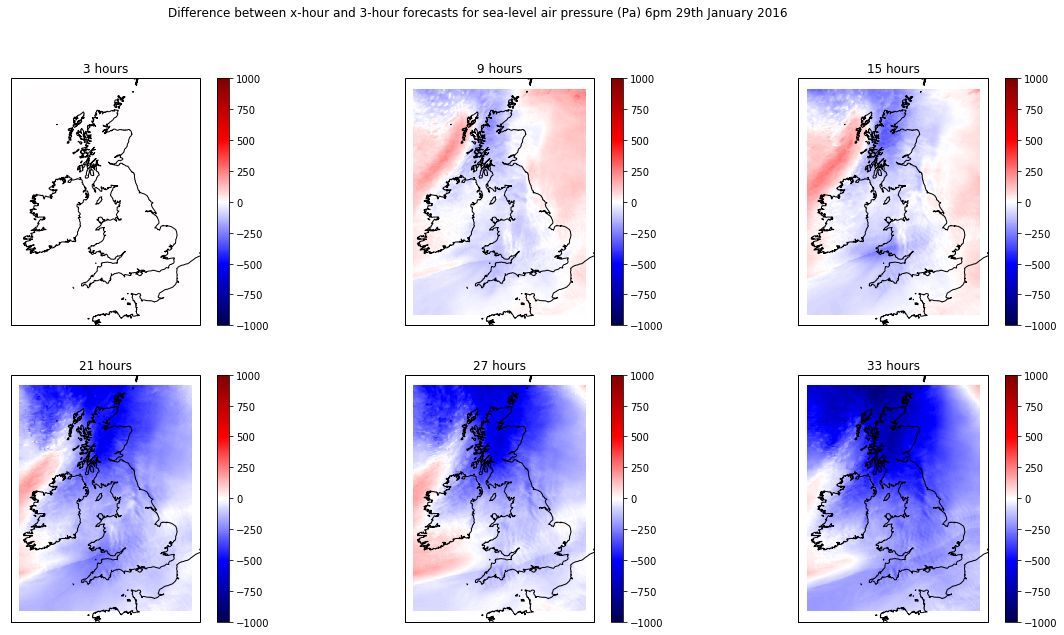

In [10]:
test_variable = "air_pressure_at_sea_level"; v_min = -1000; v_max = 1000

tplot.difference_plots(gforecasts, test_variable, v_min, v_max)
plt.suptitle('Difference between x-hour and 3-hour forecasts for sea-level air pressure (Pa) 6pm 29th January 2016')

# Rainfall for Gertrude

Text(0.5,0.98,'Forecasted rainfall rate (kg m-2 s-1)')

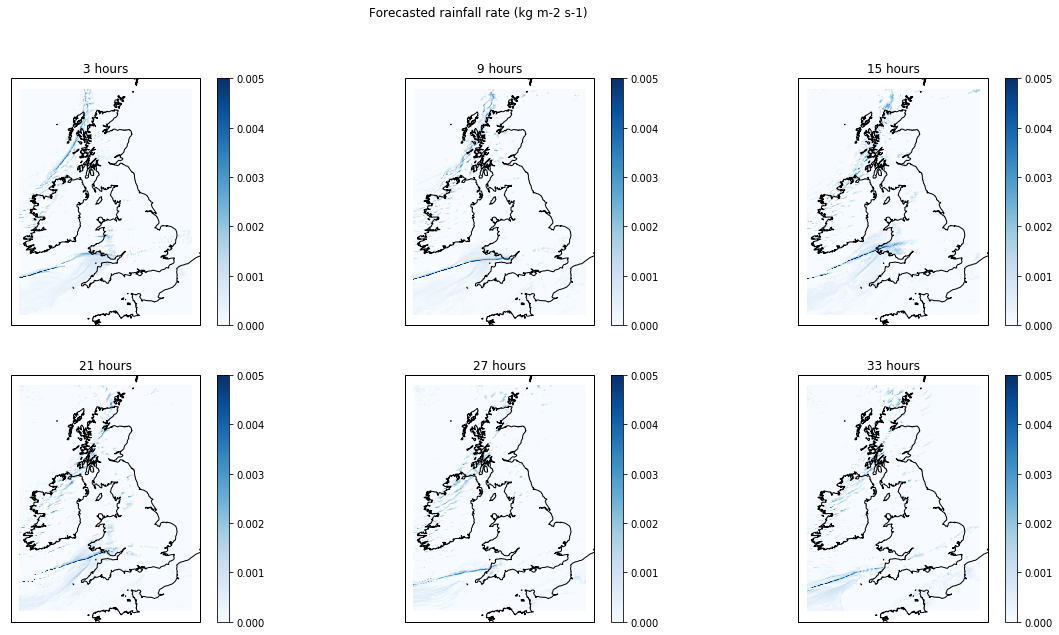

In [13]:
test_variable = "stratiform_rainfall_rate"; v_min = 0; v_max = 0.005

tplot.rain_plots(gforecasts, test_variable, v_min, v_max)
plt.suptitle("Forecasted rainfall rate (kg m-2 s-1)")

Text(0.5,0.98,'Difference rainfall')

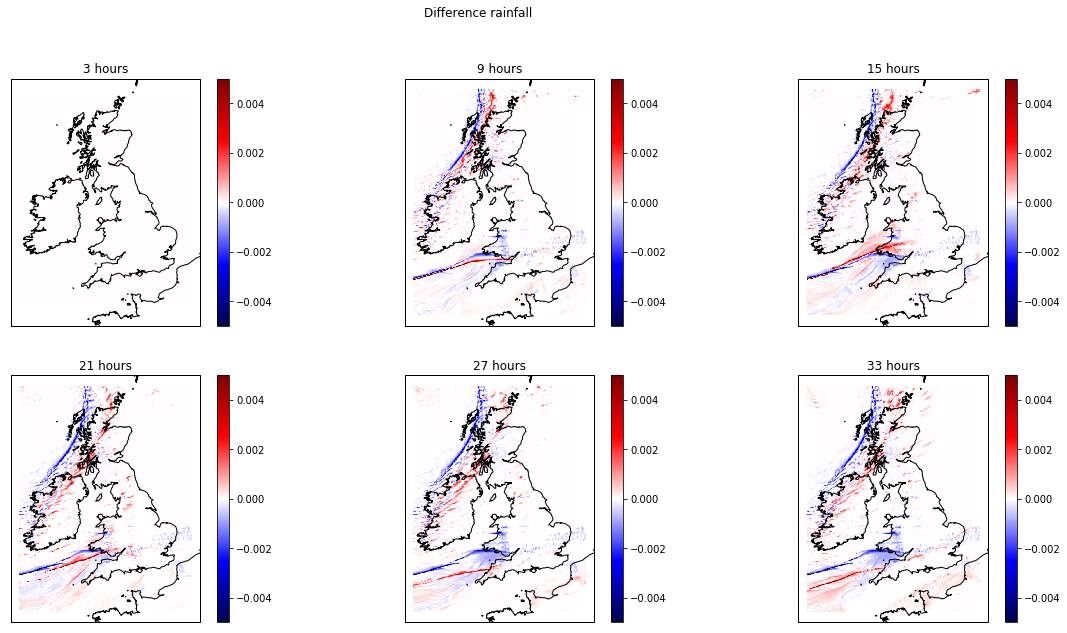

In [6]:
test_variable = "stratiform_rainfall_rate"
v_min = -0.005
v_max = 0.005

tplot.difference_rain_plots(gforecasts, test_variable, v_min, v_max)
plt.suptitle("Difference rainfall")

## The ensemble.

MOGREPS-UK has twelve ensemble members -- one control and eleven perturbed. We briefly look at the ensemble spread for a single 12-hour forecast for Storm Desmond's rainfall rate. 

The question of whether the ensemble here is "typical" of forecasts motivates the work discussed later in this presentation.

In [4]:
eforecast_1 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 1 , 12),data_folder = Path('.'))
eforecast_2 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 2 , 12),data_folder = Path('.'))
eforecast_3 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 3 , 12),data_folder = Path('.'))
eforecast_4 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 4 , 12),data_folder = Path('.'))
eforecast_5 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 5 , 12),data_folder = Path('.'))
eforecast_6 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 6 , 12),data_folder = Path('.'))
eforecast_7 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 7 , 12),data_folder = Path('.'))
eforecast_8 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 8 , 12),data_folder = Path('.'))
eforecast_9 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 9 , 12),data_folder = Path('.'))
eforecast_10 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 10 , 12),data_folder = Path('.'))
eforecast_11 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 11 , 12),data_folder = Path('.'))

control =  mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 0 , 12),data_folder = Path('.'))

File prods_op_mogreps-uk_20151205_03_01_012.nc already exists.
File prods_op_mogreps-uk_20151205_03_02_012.nc already exists.
File prods_op_mogreps-uk_20151205_03_03_012.nc already exists.
File prods_op_mogreps-uk_20151205_03_04_012.nc already exists.
File prods_op_mogreps-uk_20151205_03_05_012.nc already exists.
File prods_op_mogreps-uk_20151205_03_06_012.nc already exists.
File prods_op_mogreps-uk_20151205_03_07_012.nc already exists.
File prods_op_mogreps-uk_20151205_03_08_012.nc already exists.
File prods_op_mogreps-uk_20151205_03_09_012.nc already exists.
File prods_op_mogreps-uk_20151205_03_10_012.nc already exists.
File prods_op_mogreps-uk_20151205_03_11_012.nc already exists.
File prods_op_mogreps-uk_20151205_03_00_012.nc already exists.


In [5]:
eDS_forecast_0 = netCDF4.Dataset(control)
eDS_forecast_1 = netCDF4.Dataset(eforecast_1)
eDS_forecast_2 = netCDF4.Dataset(eforecast_2)
eDS_forecast_3 = netCDF4.Dataset(eforecast_3)
eDS_forecast_4 = netCDF4.Dataset(eforecast_4)
eDS_forecast_5 = netCDF4.Dataset(eforecast_5)
eDS_forecast_6 = netCDF4.Dataset(eforecast_6)
eDS_forecast_7 = netCDF4.Dataset(eforecast_7)
eDS_forecast_8 = netCDF4.Dataset(eforecast_8)
eDS_forecast_9 = netCDF4.Dataset(eforecast_9)
eDS_forecast_10 = netCDF4.Dataset(eforecast_10)
eDS_forecast_11 = netCDF4.Dataset(eforecast_11)

eforecasts = [eDS_forecast_0, eDS_forecast_1, eDS_forecast_2, eDS_forecast_3, eDS_forecast_4, eDS_forecast_5, eDS_forecast_6, eDS_forecast_7, eDS_forecast_8, eDS_forecast_9, eDS_forecast_10, eDS_forecast_11]

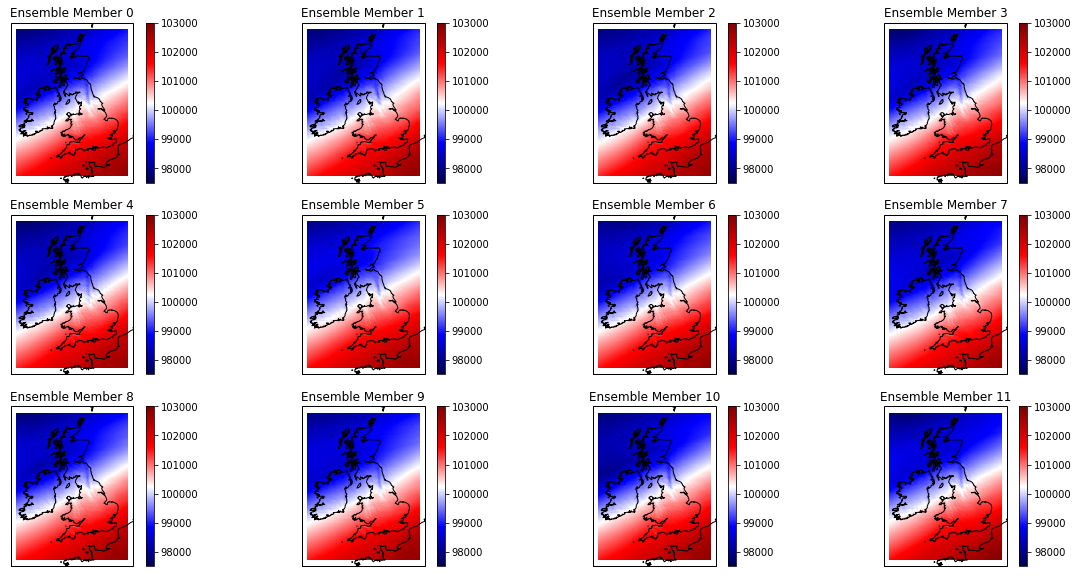

In [6]:
test_variable = "air_pressure_at_sea_level"
v_min = 97500
v_max = 103000

tplot.postage_pressure_plot(eforecasts, test_variable, v_min, v_max)

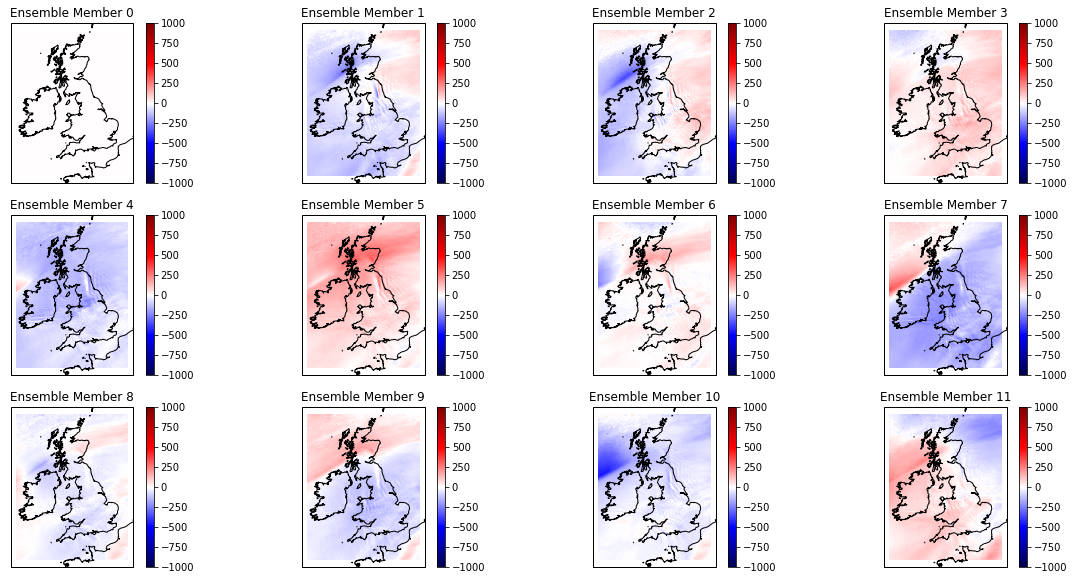

In [7]:
test_variable = "air_pressure_at_sea_level"
v_min = -1000
v_max = 1000

tplot.ensemble_pressure_plot(eforecasts, test_variable, v_min,  v_max)

Text(0.5,0.98,'Ensemble stratiform rainfall rate (kg m^-2 s^-1) -- 12 hour forecast initiated 3am 5th December 2015')

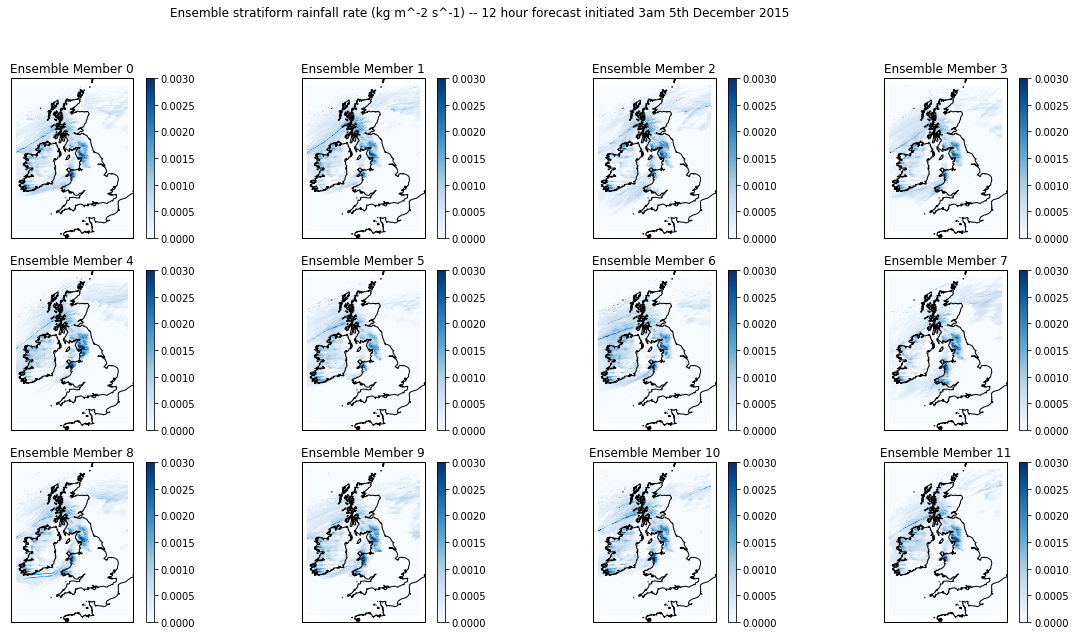

In [24]:
test_variable = "stratiform_rainfall_rate"; v_min = 0; v_max = 0.003

tplot.postage_rain_plot(eforecasts, test_variable, v_min, v_max)
plt.suptitle('Ensemble stratiform rainfall rate (kg m^-2 s^-1) -- 12 hour forecast initiated 3am 5th December 2015')

Text(0.5,0.98,'Difference between ensemble members and control for stratiform rainfall rate (kg m^-2 s^-1) -- 12 hour forecast initiated 3am 5th December 2015')

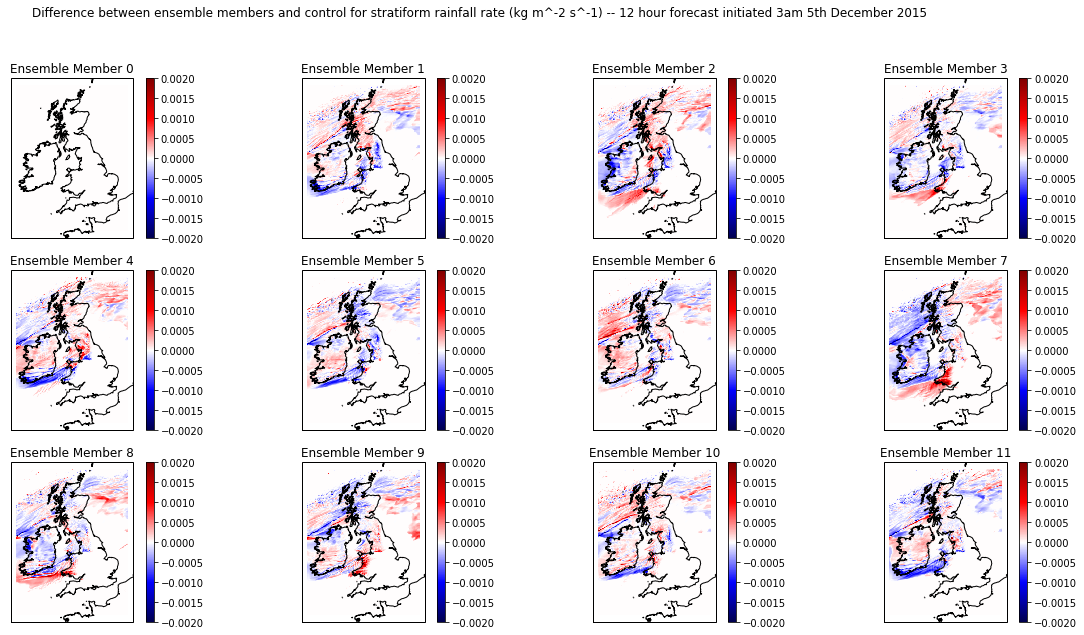

In [25]:
test_variable = "stratiform_rainfall_rate"; v_min = -0.002; v_max = 0.002

tplot.ensemble_rain_plot(eforecasts, test_variable, v_min, v_max)
plt.suptitle('Difference between ensemble members and control for stratiform rainfall rate (kg m^-2 s^-1) -- 12 hour forecast initiated 3am 5th December 2015')

## Question

**How much does the forecast change?**

Problem setup:

- Examine the control (unperturbed) forecast over 3 years (2013, 2014, 2015).
- Compare the forecast for 12PM 27 hours before and 3 hours before.
- We measure the "error" in the pressure and temperature fields.


## Quantifying our "error"

We employ a simple error metric: $\Psi_{ref}$ - forecast 27 hours before; $\Psi_{f}$ - forecast 3 hours before.

\begin{equation}
\texttt{err} \equiv \frac{\sum_{i} |\Psi^{(i)}_{ref} - \Psi_{f}^{(i)}|}{\sum_{i} \Psi^{(i)}_{ref}}
\end{equation}

- Dimensionless units
- Simple (perhaps too simple)
- Gives us a rough estimate of variability

![alt text](plotting/yearly_uc.png)

## Some observations

- What we are really seeing is some variability in the initial conditions only.
- By comparing two forecasts (27 and 3 hours before resp.), we ain't looking at model error.

However,
- This is a primitive measure of chaos. We can't necessarily observe the effects of chaos.
- A more direct measure would be to examine the emsemble spread, rather than the control.
 - May give us a better understanding of the effects of chaos and uncertainty.

## Tom

![alt text](plotting/ensemble_scatter_pressure_error_0_small.png)

![alt text](plotting/ensemble_scatter_pressure_error_1_small.png)

![alt text](plottingensemble_scatter_pressure_error_2_small.png)